In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipaddress
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

In [2]:
#Load data one_week
df = pd.read_csv('one_week.csv')
df

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425.000000,1,10.0.0.1,10.0.0.8,45304,48294064,100.000000,716000000,1.010000e+11,3,...,451.000000,0,UDP,3,143928631,3917,0.0,0.000000e+00,0.000000e+00,0.0
1,11605.000000,1,10.0.0.1,10.0.0.8,126395,134737070,280.000000,734000000,2.810000e+11,2,...,451.000000,0,UDP,4,3842,3520,0.0,0.000000e+00,0.000000e+00,0.0
2,11425.000000,1,10.0.0.2,10.0.0.8,90333,96294978,200.000000,744000000,2.010000e+11,3,...,451.000000,0,UDP,1,3795,1242,0.0,0.000000e+00,0.000000e+00,0.0
3,11425.000000,1,10.0.0.2,10.0.0.8,90333,96294978,200.000000,744000000,2.010000e+11,3,...,451.000000,0,UDP,2,3688,1492,0.0,0.000000e+00,0.000000e+00,0.0
4,11425.000000,1,10.0.0.2,10.0.0.8,90333,96294978,200.000000,744000000,2.010000e+11,3,...,451.000000,0,UDP,3,3413,3665,0.0,0.000000e+00,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15817204,0.000049,0,10.10.11.4,10.10.11.7,70620,32149809,0.000049,0,4.900000e-05,1707,...,0.000042,1707,TCP,1514,0,32149809,0.0,5.248948e+09,5.248948e+09,NaN
15817205,0.002020,0,10.10.11.7,10.10.11.4,70621,32150051,0.002020,0,2.020000e-03,1707,...,0.000042,1707,TCP,37102,0,32150051,0.0,1.273269e+08,1.273269e+08,NaN
15817206,0.000051,0,10.10.11.4,10.10.11.7,70622,32150119,0.000051,0,5.100000e-05,1707,...,0.000042,1707,TCP,1514,0,32150119,0.0,5.043156e+09,5.043156e+09,NaN
15817207,0.002015,0,10.10.11.7,10.10.11.4,70623,32150361,0.002015,0,2.015000e-03,1707,...,0.000042,1707,TCP,37102,0,32150361,0.0,1.276441e+08,1.276441e+08,NaN


In [3]:
#memberikan ringkasan statistik deskriptif dari kolom-kolom dalam sebuah DataFrame, termasuk informasi seperti rata-rata, median, kuartil, nilai maksimum, dan nilai minimum.
df.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,1.581721e+07,1.581721e+07,1.581721e+07,1.581721e+07,1.581721e+07,1.581721e+07,1.581721e+07,1.581721e+07,1.581721e+07,1.581721e+07,1.581721e+07,1.581721e+07,1.581721e+07,1.581721e+07,1.581721e+07,1.581721e+07,1.581721e+07,1.581670e+07,1.581670e+07,104345.000000
mean,1.183071e+02,2.780118e-02,2.087216e+05,2.481037e+08,2.161481e+00,3.043744e+06,2.123462e+09,7.355242e+02,2.076717e+05,3.697351e+03,4.563837e+06,1.400062e+00,7.262767e+02,1.820096e+04,6.151810e+05,2.484671e+08,6.589670e+00,8.049102e+10,8.049102e+10,0.390857
std,1.747181e+03,3.763457e-01,1.260148e+05,1.442974e+08,3.474990e+01,4.360345e+07,3.476847e+10,1.908521e+03,1.254661e+05,3.411282e+03,4.310232e+06,2.640299e+01,1.883309e+03,2.172308e+04,1.446646e+07,1.441875e+08,2.127999e+02,2.322932e+11,2.322932e+11,0.487945
min,-5.900000e-05,0.000000e+00,0.000000e+00,0.000000e+00,-5.900000e-05,0.000000e+00,-5.900000e-05,1.000000e+00,0.000000e+00,-1.309330e+05,-1.464426e+08,-4.365000e+03,0.000000e+00,1.000000e+00,0.000000e+00,6.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.200000e-05,0.000000e+00,9.961800e+04,1.227143e+08,1.200000e-05,0.000000e+00,1.200000e-05,3.000000e+01,9.894000e+04,1.235789e+03,1.546720e+06,5.983245e-05,3.000000e+01,4.430000e+02,0.000000e+00,1.235837e+08,0.000000e+00,9.409453e+08,9.409453e+08,0.000000
50%,4.500000e-05,0.000000e+00,2.058840e+05,2.498702e+08,4.500000e-05,0.000000e+00,4.500000e-05,4.500000e+01,2.056640e+05,3.376018e+03,4.080799e+06,1.231254e-04,4.500000e+01,4.430000e+02,0.000000e+00,2.503422e+08,0.000000e+00,1.139669e+10,1.139669e+10,0.000000
75%,4.830000e-04,0.000000e+00,3.127270e+05,3.751879e+08,4.830000e-04,0.000000e+00,4.830000e-04,8.000000e+01,3.117500e+05,5.338536e+03,6.526370e+06,1.864179e-04,7.900000e+01,3.873000e+04,0.000000e+00,3.753396e+08,0.000000e+00,9.830573e+10,9.830573e+10,1.000000
max,4.293500e+04,1.000000e+01,5.383080e+05,4.949000e+08,1.881000e+03,9.990000e+08,1.880000e+12,1.252100e+04,5.313740e+05,2.670600e+04,3.391395e+07,6.390000e+02,1.243700e+04,6.553200e+04,1.269982e+09,9.905962e+08,2.058000e+04,3.957698e+12,3.957698e+12,1.000000


In [4]:
#untuk memberikan informasi ringkas tentang sebuah DataFrame, termasuk informasi tentang tipe data, jumlah baris dan kolom, jumlah nilai yang tidak kosong, dan sebagainya.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15817209 entries, 0 to 15817208
Data columns (total 23 columns):
 #   Column       Dtype  
---  ------       -----  
 0   dt           float64
 1   switch       int64  
 2   src          object 
 3   dst          object 
 4   pktcount     int64  
 5   bytecount    int64  
 6   dur          float64
 7   dur_nsec     int64  
 8   tot_dur      float64
 9   flows        int64  
 10  packetins    int64  
 11  pktperflow   float64
 12  byteperflow  float64
 13  pktrate      float64
 14  Pairflow     int64  
 15  Protocol     object 
 16  port_no      int64  
 17  tx_bytes     int64  
 18  rx_bytes     int64  
 19  tx_kbps      float64
 20  rx_kbps      float64
 21  tot_kbps     float64
 22  label        float64
dtypes: float64(10), int64(10), object(3)
memory usage: 2.7+ GB


In [5]:
#Digunakan untuk mengecek missing value pada data registration
df.isnull().any()

dt             False
switch         False
src            False
dst            False
pktcount       False
bytecount      False
dur            False
dur_nsec       False
tot_dur        False
flows          False
packetins      False
pktperflow     False
byteperflow    False
pktrate        False
Pairflow       False
Protocol       False
port_no        False
tx_bytes       False
rx_bytes       False
tx_kbps        False
rx_kbps         True
tot_kbps        True
label           True
dtype: bool

In [6]:
# handling null value pada kolom 'rx_kbps' dan 'tot_kbps' dengan cara menghapus baris, dikarenakan jumlah null value sedikit dibandingkan dengan keseluruhan data
df = df.dropna(subset=['rx_kbps', 'tot_kbps'])

In [7]:
df['label'].unique()

array([ 0.,  1., nan])

In [8]:
target = 'label'

In [9]:
#Mengubah IP Address pada src dan dst ke dalam nilai numerik
df['src'] = df['src'].apply(lambda x: int(ipaddress.IPv4Address(x)))
df['dst'] = df['dst'].apply(lambda x: int(ipaddress.IPv4Address(x)))

C:\Users\user\AppData\Local\Temp\ipykernel_9156\822899112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['src'] = df['src'].apply(lambda x: int(ipaddress.IPv4Address(x)))
C:\Users\user\AppData\Local\Temp\ipykernel_9156\822899112.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dst'] = df['dst'].apply(lambda x: int(ipaddress.IPv4Address(x)))


In [10]:
# Pisahkan data yang memiliki label dan yang tidak
labeled_data = df.dropna(subset=[target])
unlabeled_data = df[df[target].isnull()]

In [11]:
# Mengubah data kategorikal pada kolom 'Protocol' menggunakan one-hot encoding
labeled_data = pd.get_dummies(labeled_data, columns=['Protocol'])
unlabeled_data = pd.get_dummies(unlabeled_data, columns=['Protocol'])

In [12]:
labeled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103839 entries, 0 to 104344
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   dt             103839 non-null  float64
 1   switch         103839 non-null  int64  
 2   src            103839 non-null  int64  
 3   dst            103839 non-null  int64  
 4   pktcount       103839 non-null  int64  
 5   bytecount      103839 non-null  int64  
 6   dur            103839 non-null  float64
 7   dur_nsec       103839 non-null  int64  
 8   tot_dur        103839 non-null  float64
 9   flows          103839 non-null  int64  
 10  packetins      103839 non-null  int64  
 11  pktperflow     103839 non-null  float64
 12  byteperflow    103839 non-null  float64
 13  pktrate        103839 non-null  float64
 14  Pairflow       103839 non-null  int64  
 15  port_no        103839 non-null  int64  
 16  tx_bytes       103839 non-null  int64  
 17  rx_bytes       103839 non-null  in

In [13]:
features = ['src', 'pktcount', 'dst', 'byteperflow', 'pktperflow', 'pktrate', 'tot_kbps', 'rx_kbps', 'flows', 'bytecount', 'dt', 'Protocol_ICMP', 'Protocol_TCP', 'Protocol_UDP', 'dur', 'tot_dur']

In [14]:
# Pisahkan data menjadi data pelatihan dan data uji
X_train, X_test, y_train, y_test = train_test_split(labeled_data[features], labeled_data[target], test_size=0.2, random_state=42)

In [15]:
# Buat model RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model pada data yang sudah ada label
model.fit(X_train, y_train)

# Prediksi label untuk data yang tidak memiliki label
predicted_labels = model.predict(unlabeled_data[features])

# Isi nilai yang hilang dengan prediksi
df.loc[df[target].isnull(), target] = predicted_labels


In [16]:
#hasil dari handling missing value kolom 'label'
df

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425.000000,1,167772161,167772168,45304,48294064,100.000000,716000000,1.010000e+11,3,...,451.000000,0,UDP,3,143928631,3917,0.0,0.000000e+00,0.000000e+00,0.0
1,11605.000000,1,167772161,167772168,126395,134737070,280.000000,734000000,2.810000e+11,2,...,451.000000,0,UDP,4,3842,3520,0.0,0.000000e+00,0.000000e+00,0.0
2,11425.000000,1,167772162,167772168,90333,96294978,200.000000,744000000,2.010000e+11,3,...,451.000000,0,UDP,1,3795,1242,0.0,0.000000e+00,0.000000e+00,0.0
3,11425.000000,1,167772162,167772168,90333,96294978,200.000000,744000000,2.010000e+11,3,...,451.000000,0,UDP,2,3688,1492,0.0,0.000000e+00,0.000000e+00,0.0
4,11425.000000,1,167772162,167772168,90333,96294978,200.000000,744000000,2.010000e+11,3,...,451.000000,0,UDP,3,3413,3665,0.0,0.000000e+00,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15817204,0.000049,0,168430340,168430343,70620,32149809,0.000049,0,4.900000e-05,1707,...,0.000042,1707,TCP,1514,0,32149809,0.0,5.248948e+09,5.248948e+09,1.0
15817205,0.002020,0,168430343,168430340,70621,32150051,0.002020,0,2.020000e-03,1707,...,0.000042,1707,TCP,37102,0,32150051,0.0,1.273269e+08,1.273269e+08,1.0
15817206,0.000051,0,168430340,168430343,70622,32150119,0.000051,0,5.100000e-05,1707,...,0.000042,1707,TCP,1514,0,32150119,0.0,5.043156e+09,5.043156e+09,1.0
15817207,0.002015,0,168430343,168430340,70623,32150361,0.002015,0,2.015000e-03,1707,...,0.000042,1707,TCP,37102,0,32150361,0.0,1.276441e+08,1.276441e+08,1.0


In [17]:
#memilih feature yang digunakan berdasarkan jurnal 'https://www.mdpi.com/2079-9292/10/11/1227/pdf'
selected_attributes = ['src', 'pktcount', 'dst', 'byteperflow', 'pktperflow', 'pktrate', 'tot_kbps', 'rx_kbps', 'flows', 'bytecount', 'dt', 'Protocol', 'dur', 'tot_dur', 'label']

# Buat dataframe baru hanya dengan atribut yang diberikan
selected_data = df[selected_attributes]

# Tampilkan dataframe yang baru
selected_data

,src,pktcount,dst,byteperflow,pktperflow,pktrate,tot_kbps,rx_kbps,flows,bytecount,dt,Protocol,dur,tot_dur,label
0,167772161,45304,167772168,1.442831e+07,13535.000000,451.000000,0.000000e+00,0.000000e+00,3,48294064,11425.000000,UDP,100.000000,1.010000e+11,0.0
1,167772161,126395,167772168,1.442405e+07,13531.000000,451.000000,0.000000e+00,0.000000e+00,2,134737070,11605.000000,UDP,280.000000,2.810000e+11,0.0
2,167772162,90333,167772168,1.442724e+07,13534.000000,451.000000,0.000000e+00,0.000000e+00,3,96294978,11425.000000,UDP,200.000000,2.010000e+11,0.0
3,167772162,90333,167772168,1.442724e+07,13534.000000,451.000000,0.000000e+00,0.000000e+00,3,96294978,11425.000000,UDP,200.000000,2.010000e+11,0.0
4,167772162,90333,167772168,1.442724e+07,13534.000000,451.000000,0.000000e+00,0.000000e+00,3,96294978,11425.000000,UDP,200.000000,2.010000e+11,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15817204,168430340,70620,168430343,1.883410e+04,41.370826,0.000042,5.248948e+09,5.248948e+09,1707,32149809,0.000049,TCP,0.000049,4.900000e-05,1.0
15817205,168430343,70621,168430340,1.883424e+04,41.371412,0.000042,1.273269e+08,1.273269e+08,1707,32150051,0.002020,TCP,0.002020,2.020000e-03,1.0
15817206,168430340,70622,168430343,1.883428e+04,41.371998,0.000042,5.043156e+09,5.043156e+09,1707,32150119,0.000051,TCP,0.000051,5.100000e-05,1.0
15817207,168430343,70623,168430340,1.883442e+04,41.372583,0.000042,1.276441e+08,1.276441e+08,1707,32150361,0.002015,TCP,0.002015,2.015000e-03,1.0


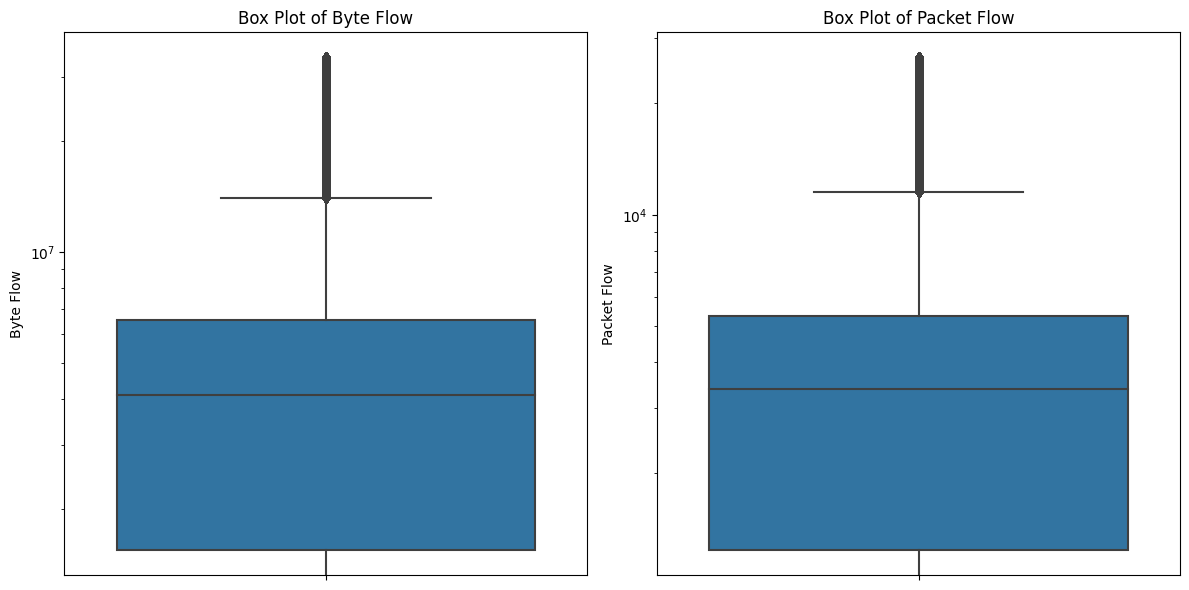

In [18]:
#Visualisasi

# Side by Side Box Plot untuk Byte Flow dan Packet Flow
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=selected_data, y='byteperflow')
plt.title('Box Plot of Byte Flow')
plt.ylabel('Byte Flow')
plt.yscale('log')

plt.subplot(1, 2, 2)
sns.boxplot(data=selected_data, y='pktperflow')
plt.title('Box Plot of Packet Flow')
plt.ylabel('Packet Flow')
plt.yscale('log')
plt.tight_layout()

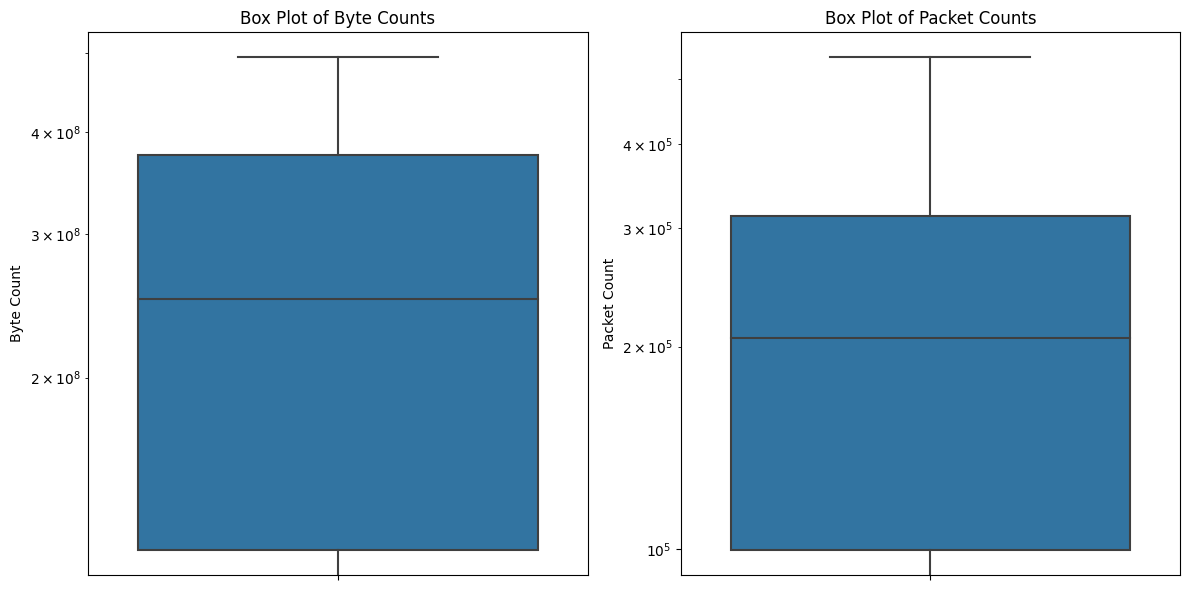

In [19]:
# Side by Side Box Plot untuk Byte Count dan Packet Count
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=selected_data, y='bytecount')
plt.title('Box Plot of Byte Counts')
plt.ylabel('Byte Count')
plt.yscale('log')

plt.subplot(1, 2, 2)
sns.boxplot(data=selected_data, y='pktcount')
plt.title('Box Plot of Packet Counts')
plt.ylabel('Packet Count')
plt.yscale('log')
plt.tight_layout()


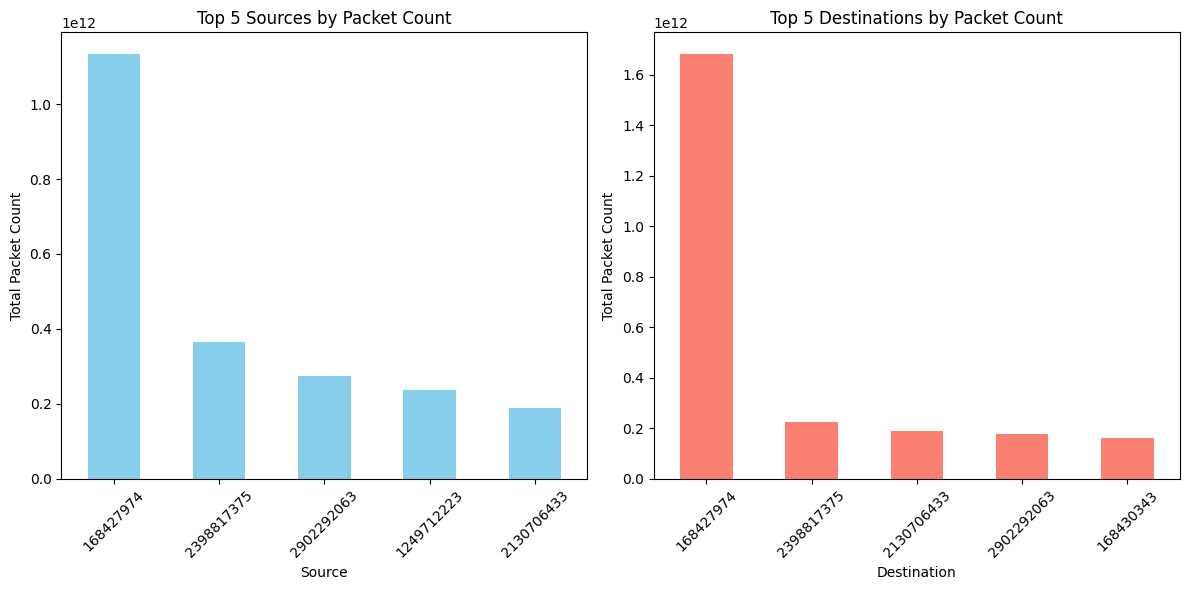

In [20]:
# Side by Side Bar Chart for Top 5 Sources and Destinations by Packet Count
top_sources = df.groupby('src')['pktcount'].sum().sort_values(ascending=False).head(5)
top_destinations = df.groupby('dst')['pktcount'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
top_sources.plot(kind='bar', color='skyblue')
plt.title('Top 5 Sources by Packet Count')
plt.xlabel('Source')
plt.ylabel('Total Packet Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
top_destinations.plot(kind='bar', color='salmon')
plt.title('Top 5 Destinations by Packet Count')
plt.xlabel('Destination')
plt.ylabel('Total Packet Count')
plt.xticks(rotation=45)
plt.tight_layout()

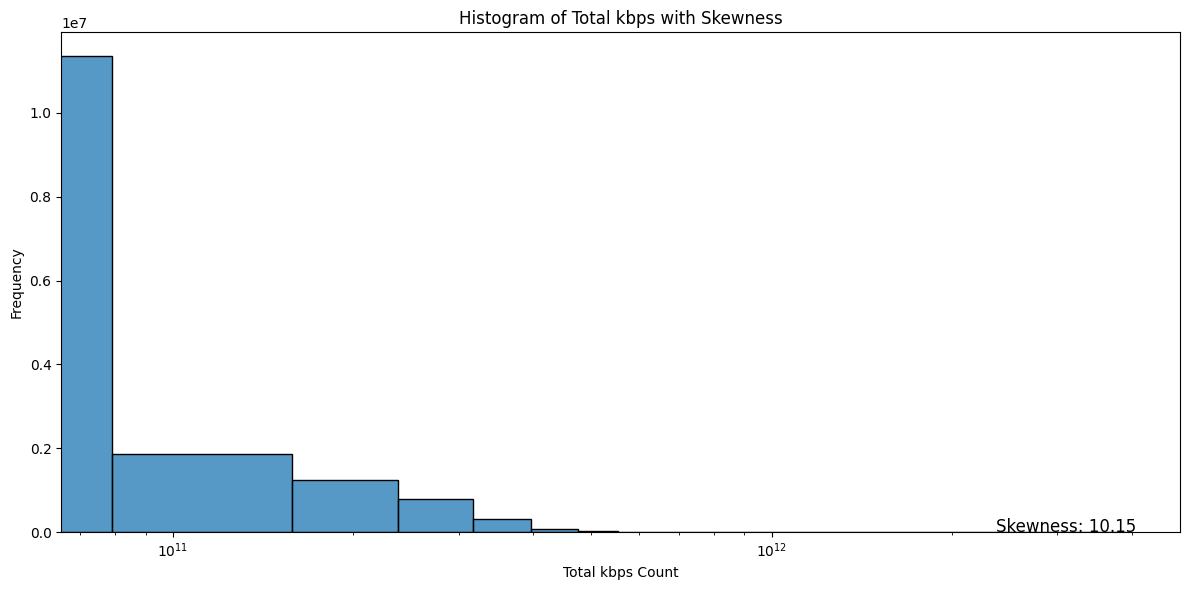

In [29]:
# Histogram of Packet Count with Skewness
plt.figure(figsize=(12, 6))
sns.histplot(selected_data['tot_kbps'], bins=50, kde=False)
plt.title('Histogram of Total kbps with Skewness')
plt.xlabel('Total kbps Count')
plt.ylabel('Frequency')
plt.xscale('log')
plt.grid(False)
plt.text(x=selected_data['tot_kbps'].max()*0.6, y=30, 
         s=f"Skewness: {selected_data['tot_kbps'].skew():.2f}", 
         fontsize=12)
plt.tight_layout()

plt.show()

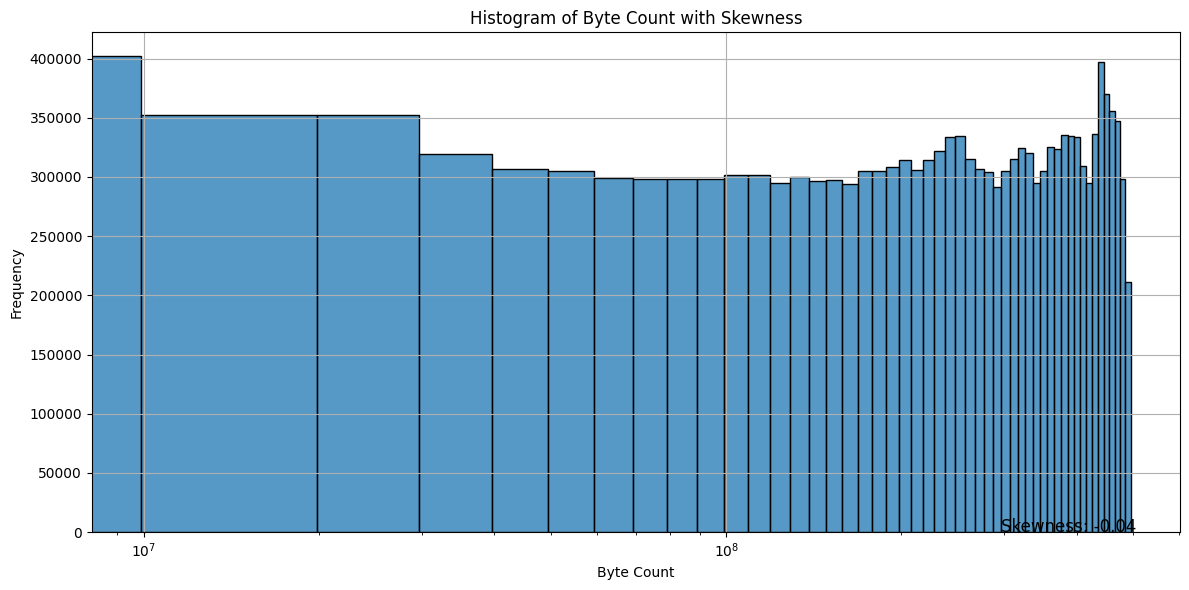

In [32]:
# Histogram of Packet Count with Skewness
plt.figure(figsize=(12, 6))
sns.histplot(selected_data['bytecount'], bins=50, kde=False)
plt.title('Histogram of Byte Count with Skewness')
plt.xlabel('Byte Count')
plt.ylabel('Frequency')
plt.xscale('log')
plt.grid(True)
plt.text(x=selected_data['bytecount'].max()*0.6, y=30, 
         s=f"Skewness: {selected_data['bytecount'].skew():.2f}", 
         fontsize=12)
plt.tight_layout()

plt.show()

In [22]:
selected_data = pd.get_dummies(selected_data, columns=['Protocol'])

X = selected_data.drop('label', axis=1)
y = selected_data['label']

#Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
label_counts = y_train.value_counts()

# Menampilkan jumlah masing-masing label
print("Jumlah masing-masing label:")
print(label_counts)

Jumlah masing-masing label:
label
1.0    12209853
0.0      443509
Name: count, dtype: int64


In [24]:
under_sampler = RandomUnderSampler(sampling_strategy=1.0, random_state=42)

# Terapkan under-sampler pada data pelatihan
X_resampled, y_resampled = under_sampler.fit_resample(X_train, y_train)

# Tampilkan distribusi kelas setelah under-sampling
label_counts = y_resampled.value_counts()

# Tampilkan hasil
print("Jumlah masing-masing label:")
print(label_counts)


Jumlah masing-masing label:
label
0.0    443509
1.0    443509
Name: count, dtype: int64


In [25]:
def plot_confusion_matrix(conf_matrix, classes):
    """
    This function plots a confusion matrix.
    Arguments:
    conf_matrix: Confusion matrix from a classifier.
    classes: Array of class labels.
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", 
                cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

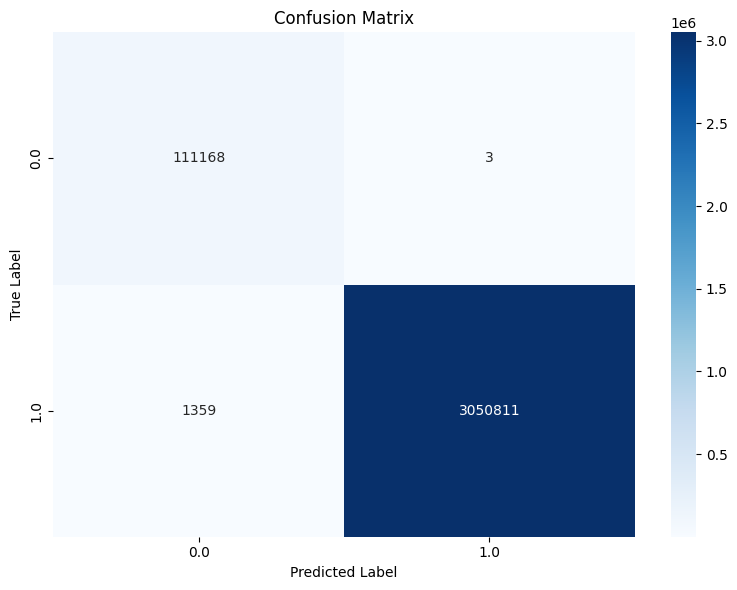

Classification Report Before Optimization:
              precision    recall  f1-score   support

         0.0     0.9879    1.0000    0.9939    111171
         1.0     1.0000    0.9996    0.9998   3052170

    accuracy                         0.9996   3163341
   macro avg     0.9940    0.9998    0.9968   3163341
weighted avg     0.9996    0.9996    0.9996   3163341



In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Fit the model to the training data
rf_model.fit(X_resampled, y_resampled)

# Make predictions on the testing data
y_pred_before = rf_model.predict(X_test)

# Display the classification report before optimization
class_report_before = classification_report(y_test, y_pred_before, digits=4)
conf_matrix = confusion_matrix(y_test, y_pred_before)
plot_confusion_matrix(conf_matrix, classes=np.unique(y))
print('Classification Report Before Optimization:')
print(class_report_before)

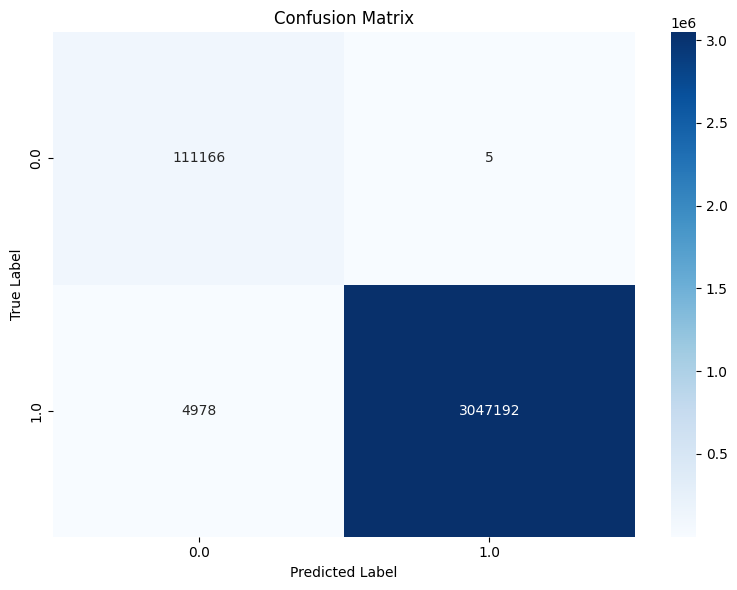

Classification Report after Optimization:
              precision    recall  f1-score   support

         0.0     0.9571    1.0000    0.9781    111171
         1.0     1.0000    0.9984    0.9992   3052170

    accuracy                         0.9984   3163341
   macro avg     0.9786    0.9992    0.9886   3163341
weighted avg     0.9985    0.9984    0.9984   3163341



In [27]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Fit the model to the training data
rf_model.fit(X_resampled, y_resampled)

# Make predictions on the testing data
y_pred_before = rf_model.predict(X_test)

# Display the classification report before optimization
class_report_before = classification_report(y_test, y_pred_before, digits=4)
conf_matrix = confusion_matrix(y_test, y_pred_before)
plot_confusion_matrix(conf_matrix, classes=np.unique(y))
print('Classification Report after Optimization:')
print(class_report_before)

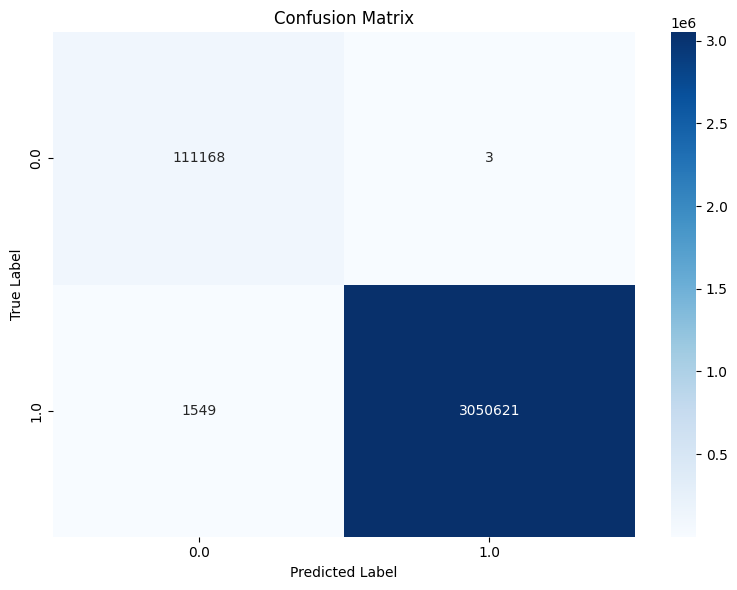

Classification Report after Optimization:
              precision    recall  f1-score   support

         0.0     0.9863    1.0000    0.9931    111171
         1.0     1.0000    0.9995    0.9997   3052170

    accuracy                         0.9995   3163341
   macro avg     0.9931    0.9997    0.9964   3163341
weighted avg     0.9995    0.9995    0.9995   3163341



In [28]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)

# Fit the model to the training data
rf_model.fit(X_resampled, y_resampled)

# Make predictions on the testing data
y_pred_before = rf_model.predict(X_test)

# Display the classification report before optimization
class_report_before = classification_report(y_test, y_pred_before, digits=4)
conf_matrix = confusion_matrix(y_test, y_pred_before)
plot_confusion_matrix(conf_matrix, classes=np.unique(y))
print('Classification Report after Optimization:')
print(class_report_before)